# PREDICTION OF TELECOM CUSTOMER CHURN

# Business Overview

Telecom, a telecommunications company, has compiled data on their customers and whether or not they have stopped doing business, or churned, with Telecom. In the competitive world of telecommunication carriers, customer retention is key. Over 95% of Americans already own a cell phone. Moreover, acquiring new customers can cost up to 25 times more than retaining existing customers. Telecommunication carriers look to big data analytics around demographics, usage, customer accounts, connectivity, network performance and reliability, customer support and service issues, and more, to reduce customer churn rates. Predicting customer churn is critical for telecommunication companies to be able to retain customers effectively. For this reason, large telecommunications corporations are seeking to develop models to predict which customers are more likely to change and take action accordingly.



### Specific Objectives
1. To build machine learning models that will predict how likely a customer will churn by analyzing its features: demographic information, account information, and services information.
2. To find the best machine learning model for the correct classification of churn/non-churn customers.
3. To determine which features affect the customer churn rate thereby giving necessary recommendations.


### Research Questions
1. What features of the dataset are primary determinants of customer churn and to what extent?

2. What are the ways that these findings can be interpreted and how can Mobi-Tel implement cost-effective solutions?

3. Will these solutions be feasible in reducing the customer churn rate by 50%?


### Metric of Success


## Data Set


As shown above, the data set contains 19 independent variables, which can be classified into 3 groups:

(1) Demographic Information

Gender, Age, Marital Status, Dependents

(2) Customer Account Information

Tenure, Contract, PaperlessBilling, PaymentMethod, MontlyCharges, TotalCharges

(3) Services Information

PhoneService, MultipleLines, InternetServices, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies

# 2. Data Understanding

Data Understanding helps us know where the data came from and how they relate to the data anaysis questions It helps us know what and who is in the data presented, and the properties of the variables to be used.

#### Importing the necessary Libraries

In [66]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns",None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.svm import SVC
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Lasso
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import GridSearchCV


### Data Reading

The first step of the analysis consists of reading and storing the data in a Pandas data frame using the *pandas.read_csv* function.

In [5]:
# import Mobitel dataset into a pandas data frame
df = pd.read_csv("telecom_customer_churn.csv",index_col=0)

#preview the data
df

,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
Customer ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987-LUTYD,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,13,Offer D,Yes,46.68,No,Yes,DSL,59.0,Yes,No,No,Yes,No,No,Yes,Yes,One Year,No,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed,NaN,NaN
9992-RRAMN,Male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,22,Offer D,Yes,16.20,Yes,Yes,Fiber Optic,17.0,No,No,No,No,No,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction
9992-UJOEL,Male,22,No,0,Elk,95432,39.108252,-123.645121,0,2,Offer E,Yes,18.62,No,Yes,DSL,51.0,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,50.30,92.75,0.00,0,37.24,129.99,Joined,NaN,NaN


In [6]:
# Column Descriptions
col_desc = pd.read_csv("telecom_data_dictionary.csv",encoding = "latin1",index_col = 1)
Col_desc = col_desc.drop(['Table'],axis=1)
Col_desc 

,Description
Field,
CustomerID,A unique ID that identifies each customer
Gender,"The customers gender: Male, Female"
Age,"The customers current age, in years, at the t..."
Married,"Indicates if the customer is married: Yes, No"
Number of Dependents,Indicates the number of dependents that live w...
City,The city of the customers primary residence i...
Zip Code,The zip code of the customers primary residence
Latitude,The latitude of the customers primary residence
Longitude,The longitude of the customers primary residence


In [7]:
#General description of the datasets 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   object 
 3   Number of Dependents               7043 non-null   int64  
 4   City                               7043 non-null   object 
 5   Zip Code                           7043 non-null   int64  
 6   Latitude                           7043 non-null   float64
 7   Longitude                          7043 non-null   float64
 8   Number of Referrals                7043 non-null   int64  
 9   Tenure in Months                   7043 non-null   int64  
 10  Offer                              7043 non-null   object 
 11  Phone Service                      7043 non-nu

In [8]:
#changing the columns with object dtype to categories
df[df.select_dtypes(['object']).columns] = df.select_dtypes(['object']).apply(lambda x: x.astype('category'))
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Gender                             7043 non-null   category
 1   Age                                7043 non-null   int64   
 2   Married                            7043 non-null   category
 3   Number of Dependents               7043 non-null   int64   
 4   City                               7043 non-null   category
 5   Zip Code                           7043 non-null   int64   
 6   Latitude                           7043 non-null   float64 
 7   Longitude                          7043 non-null   float64 
 8   Number of Referrals                7043 non-null   int64   
 9   Tenure in Months                   7043 non-null   int64   
 10  Offer                              7043 non-null   category
 11  Phone Service                    

The data contains 37 columns and 7043 rows with datatypes intergers, float and categories.

In [9]:
#Get the statistical description of the dataset bom_movies
df.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


The dataset contains 15 numerical columns 9 of which are floats and 6 are integers. It also has 23 categorical columns.

### Data Cleaning

Data cleaning helps us ensure data is free of inaccuracies, inconcistencies, non-uniformity and incompleteness.

In [10]:
# Removing column spaces
df.columns = df.columns.str.replace(' ', '')

Seperate numerical from categorical data for easy analysis

In [11]:
#isolate the columns with dtypes: int64 and float64
df_num = df.select_dtypes(include=["int64", "float64"])

df_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            7043 non-null   int64  
 1   NumberofDependents             7043 non-null   int64  
 2   ZipCode                        7043 non-null   int64  
 3   Latitude                       7043 non-null   float64
 4   Longitude                      7043 non-null   float64
 5   NumberofReferrals              7043 non-null   int64  
 6   TenureinMonths                 7043 non-null   int64  
 7   AvgMonthlyLongDistanceCharges  6361 non-null   float64
 8   AvgMonthlyGBDownload           5517 non-null   float64
 9   MonthlyCharge                  7043 non-null   float64
 10  TotalCharges                   7043 non-null   float64
 11  TotalRefunds                   7043 non-null   float64
 12  TotalExtraDataCharges          7043 no

#### Missing values of Numerical Data

In [12]:
# Checking for Missing values for the numerical data
missing_num = df.isna().sum().sort_values(ascending = False)
missing_num

ChurnReason                      5174
ChurnCategory                    5174
InternetType                     1526
UnlimitedData                    1526
StreamingMusic                   1526
StreamingMovies                  1526
StreamingTV                      1526
PremiumTechSupport               1526
DeviceProtectionPlan             1526
OnlineSecurity                   1526
AvgMonthlyGBDownload             1526
OnlineBackup                     1526
AvgMonthlyLongDistanceCharges     682
MultipleLines                     682
Contract                            0
Married                             0
CustomerStatus                      0
TotalRevenue                        0
TotalLongDistanceCharges            0
TotalExtraDataCharges               0
TotalRefunds                        0
TotalCharges                        0
MonthlyCharge                       0
PaymentMethod                       0
PaperlessBilling                    0
NumberofDependents                  0
City        

In [13]:
# Percentages of missing values of the numerical data
per_missing_vals = missing_num*100/len(df)
per_missing_vals.sort_values(ascending=False)


ChurnReason                      73.463013
ChurnCategory                    73.463013
InternetType                     21.666903
UnlimitedData                    21.666903
StreamingMusic                   21.666903
StreamingMovies                  21.666903
StreamingTV                      21.666903
PremiumTechSupport               21.666903
DeviceProtectionPlan             21.666903
OnlineSecurity                   21.666903
AvgMonthlyGBDownload             21.666903
OnlineBackup                     21.666903
MultipleLines                     9.683374
AvgMonthlyLongDistanceCharges     9.683374
InternetService                   0.000000
PhoneService                      0.000000
Offer                             0.000000
TenureinMonths                    0.000000
NumberofDependents                0.000000
Age                               0.000000
NumberofReferrals                 0.000000
Longitude                         0.000000
Latitude                          0.000000
ZipCode    

From the numerical features, only two columns (`Avg Monthly GB Download`,`Avg Monthly Long Distance Charges`) had missing values: ~21% and ~9% respectively.

Let's check the distribution to determine what measure of central tendency to use in filling in the missing values.

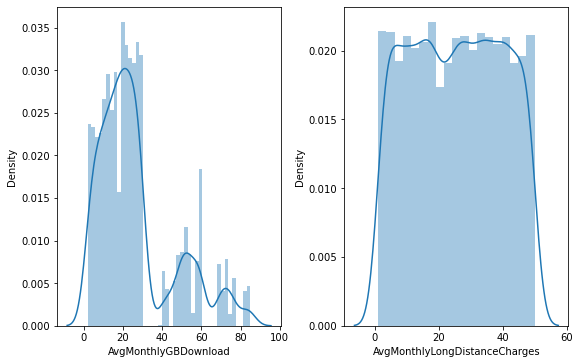

In [14]:
# Creating a function to draw a distplot
num_miss = ['AvgMonthlyGBDownload','AvgMonthlyLongDistanceCharges']
fig,ax = plt.subplots(ncols=2,nrows = 1,figsize = (8,5))
index = 0 
ax = ax.flatten()
for col,value in df[num_miss].items():
    sns.distplot(value,ax = ax[index])
    index += 1
plt.tight_layout(pad= 0.5,w_pad= 0.5,h_pad=3.0);

The `AveragemonthlyGBDownload` is highly skewed to the right prompting use of the median to fill in the missing values.



In [15]:
df_num['AvgMonthlyGBDownload'].fillna(df_num['AvgMonthlyGBDownload'].median(),inplace= True)

For the `Averagemonthlylongdistancechargesdata`, it seems to somewhat take the normal distribution out of the close ranges of the data. For this reason, either the mean, median or mode works. For clarity we will check for $outliers$ to best determine the best measure of central tendency for the `Averagemonthlylongdistancechargesdata`.   


#### Outliers

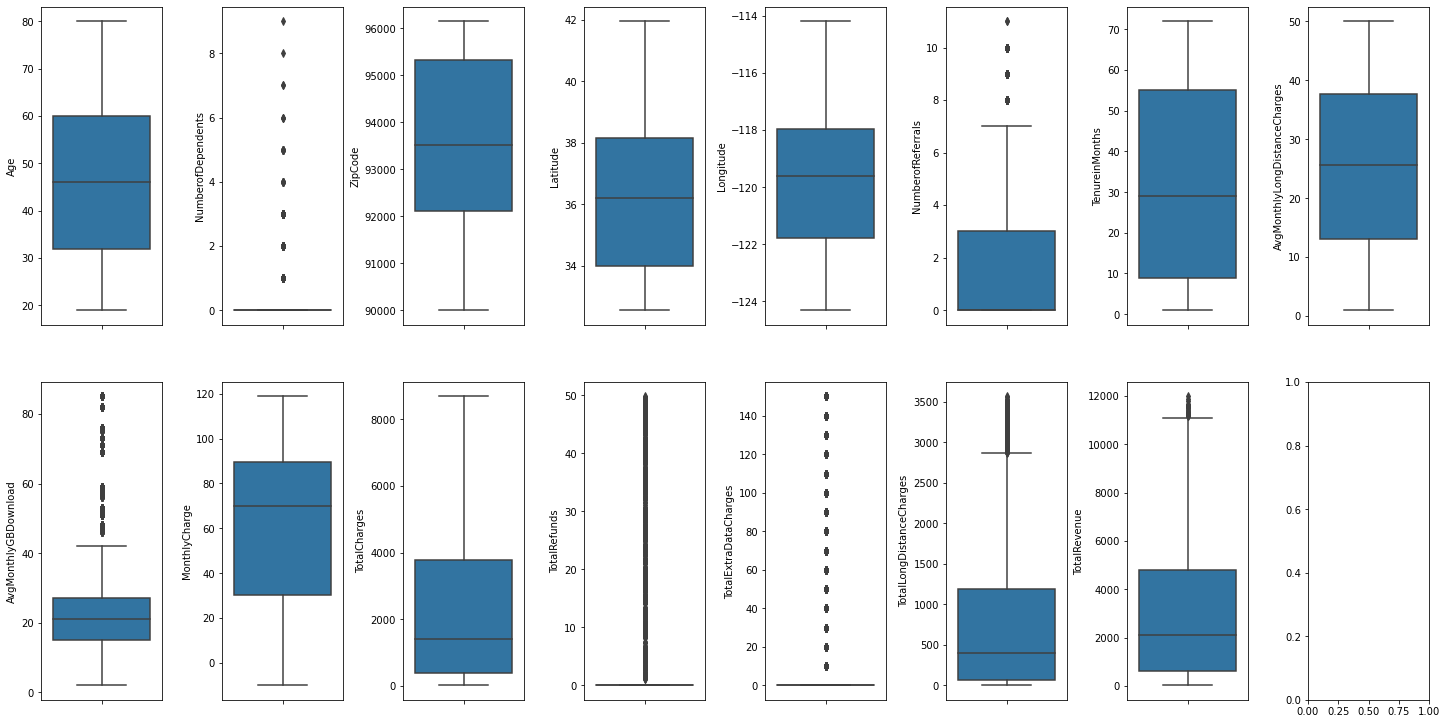

In [16]:
# Check for outliers in the dataset
fig,ax = plt.subplots(ncols=8,nrows =2,figsize = (20,10))
index = 0 
ax = ax.flatten()
for col,value in df_num.items():
    sns.boxplot(y = col,data = df_num,ax = ax[index])
    index += 1
plt.tight_layout(pad= 0.5,w_pad= 0.7,h_pad=5.0);

Very few features have outliers. The `Average monthly long distance charges data` has no outliers hence the best measure to fill in the missing values would be the mean.

In [17]:
# Filling in missing values with the mean
df_num['AvgMonthlyLongDistanceCharges'].fillna(df_num['AvgMonthlyLongDistanceCharges'].mean(),inplace = True)


In [18]:
df_num.isna().sum()

Age                              0
NumberofDependents               0
ZipCode                          0
Latitude                         0
Longitude                        0
NumberofReferrals                0
TenureinMonths                   0
AvgMonthlyLongDistanceCharges    0
AvgMonthlyGBDownload             0
MonthlyCharge                    0
TotalCharges                     0
TotalRefunds                     0
TotalExtraDataCharges            0
TotalLongDistanceCharges         0
TotalRevenue                     0
dtype: int64

There are no more missing values of the numerical data, let's proceed to categorical data

#### Missing values of Categorical data

In [19]:
#isolate columns with dtypes: object
df_cat = df.select_dtypes(exclude=["int64", "float64"])
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Gender                7043 non-null   category
 1   Married               7043 non-null   category
 2   City                  7043 non-null   category
 3   Offer                 7043 non-null   category
 4   PhoneService          7043 non-null   category
 5   MultipleLines         6361 non-null   category
 6   InternetService       7043 non-null   category
 7   InternetType          5517 non-null   category
 8   OnlineSecurity        5517 non-null   category
 9   OnlineBackup          5517 non-null   category
 10  DeviceProtectionPlan  5517 non-null   category
 11  PremiumTechSupport    5517 non-null   category
 12  StreamingTV           5517 non-null   category
 13  StreamingMovies       5517 non-null   category
 14  StreamingMusic        5517 non-null   category

In [20]:
# Lets check for missing values
Missing_cat = df_cat.isna().sum().sort_values(ascending = False)
Missing_cat

ChurnReason             5174
ChurnCategory           5174
OnlineBackup            1526
UnlimitedData           1526
StreamingMusic          1526
StreamingMovies         1526
StreamingTV             1526
DeviceProtectionPlan    1526
PremiumTechSupport      1526
OnlineSecurity          1526
InternetType            1526
MultipleLines            682
Married                    0
InternetService            0
PhoneService               0
Offer                      0
Contract                   0
PaperlessBilling           0
PaymentMethod              0
CustomerStatus             0
City                       0
Gender                     0
dtype: int64

In [21]:
# Missing Value percentages
per_missing_cat = Missing_cat*100/len(df)
per_missing_cat.sort_values(ascending=False)

ChurnReason             73.463013
ChurnCategory           73.463013
OnlineBackup            21.666903
UnlimitedData           21.666903
StreamingMusic          21.666903
StreamingMovies         21.666903
StreamingTV             21.666903
DeviceProtectionPlan    21.666903
PremiumTechSupport      21.666903
OnlineSecurity          21.666903
InternetType            21.666903
MultipleLines            9.683374
Married                  0.000000
InternetService          0.000000
PhoneService             0.000000
Offer                    0.000000
Contract                 0.000000
PaperlessBilling         0.000000
PaymentMethod            0.000000
CustomerStatus           0.000000
City                     0.000000
Gender                   0.000000
dtype: float64

About 73% of the missing entries are found in the "churn category" and "churn reason" columns. From this, it follows that a significant portion of customers who leave a telecommunications firm may fail to provide justification. Because of this, the vast majority of missing values in this instance represent the anticipated informal churning in which no input is provided. 

Since it is impossible to categorize a client who is leaving without providing a reason, the two columns are related in that they both contain a similar quantity of missing values. Due to the lack of feedback from this churning group, it is reasonable to mark the missing data as "No feedback" to indicate that the numbers are missing.

In [22]:
# Define a function to fill in values
def filling_null_cat (data):
    values_to_fill = {
        col:data[col].mode()[0]
        for col in data.columns
    }
    return data.fillna(values_to_fill,inplace=True)

In [23]:
filling_null_cat(df_cat)
df_cat.isna().sum()

Gender                  0
Married                 0
City                    0
Offer                   0
PhoneService            0
MultipleLines           0
InternetService         0
InternetType            0
OnlineSecurity          0
OnlineBackup            0
DeviceProtectionPlan    0
PremiumTechSupport      0
StreamingTV             0
StreamingMovies         0
StreamingMusic          0
UnlimitedData           0
Contract                0
PaperlessBilling        0
PaymentMethod           0
CustomerStatus          0
ChurnCategory           0
ChurnReason             0
dtype: int64

### Exploratory Data Analysis

In order to better comprehend the patterns in the data and even develop some hypotheses, let's first begin by studying our data set. In order to find any significant trends, we will first examine the distribution of the various variables.

### Univariate Analysis

#### Analysis of Categorical Features

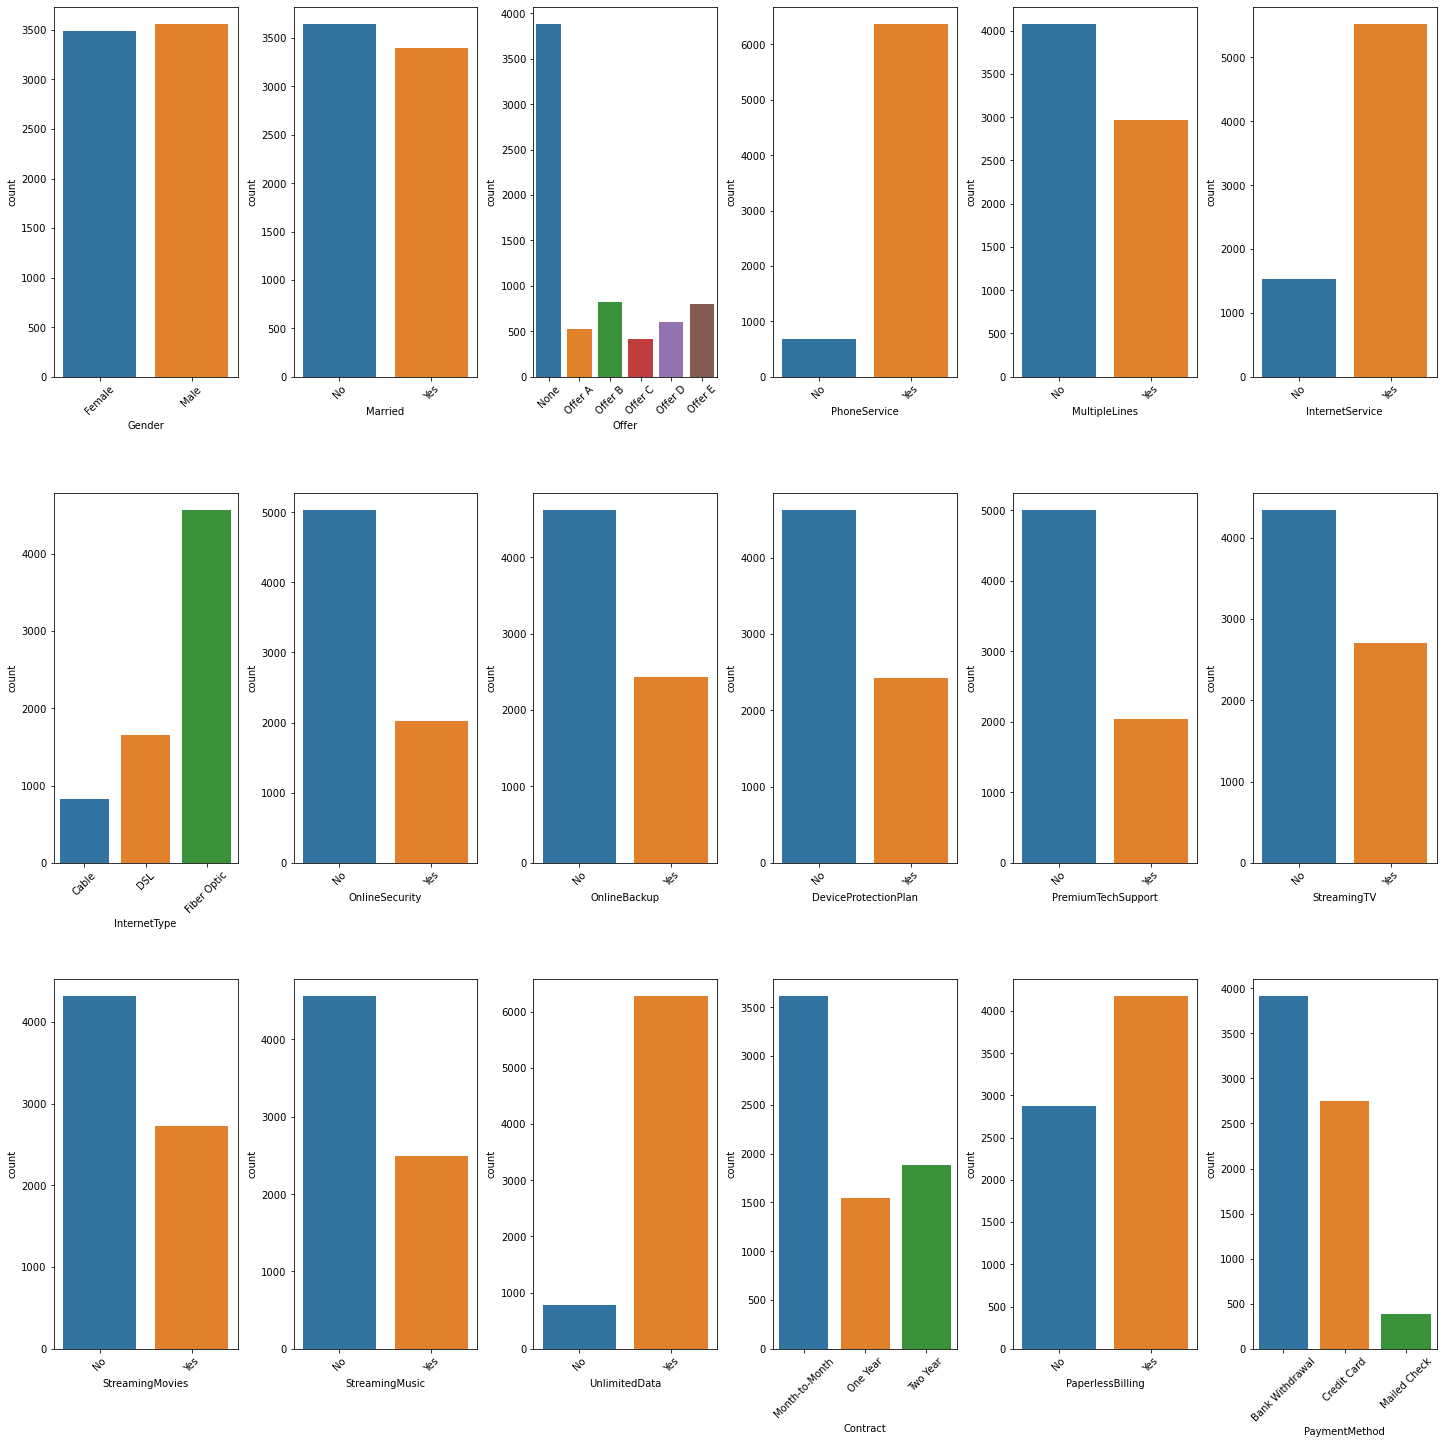

In [24]:
cat_features = ['Gender','Married','Offer','PhoneService','MultipleLines','InternetService','InternetType','OnlineSecurity','OnlineBackup','DeviceProtectionPlan','PremiumTechSupport','StreamingTV','StreamingMovies','StreamingMusic','UnlimitedData','Contract','PaperlessBilling','PaymentMethod']
fig,ax = plt.subplots(ncols=6,nrows=3,figsize = (20,20))
index = 0 
ax = ax.flatten()
for col,value in df_cat[cat_features].items():
    p = sns.countplot(x = col,data=df_cat[cat_features],ax = ax[index])
    p.tick_params(axis='x', rotation=45)
    plt.xticks(rotation = "45")
    index += 1
plt.tight_layout(pad= 0.5,w_pad= 0.7,h_pad=5.0);

#### We can extract the following conclusions by evaluating visualizations:

1. About half of the customers in our data set are male while the other half are female
2. About 50% of the customers have a partner
3. About 50% of the customers have a partner, while only 30% of the total customers have dependents.
4. Several customers chose the Fiber optic service than DSL and Cable.
5. Customers opted for Bank withdrawals while others use Credit-Card and Mailed Check as Payment Method.
6. Most of the customers are in the month to month contract. While there are equal number of customers in the 1 year and 2 year contracts. 

#### Analysis of Numerical data 

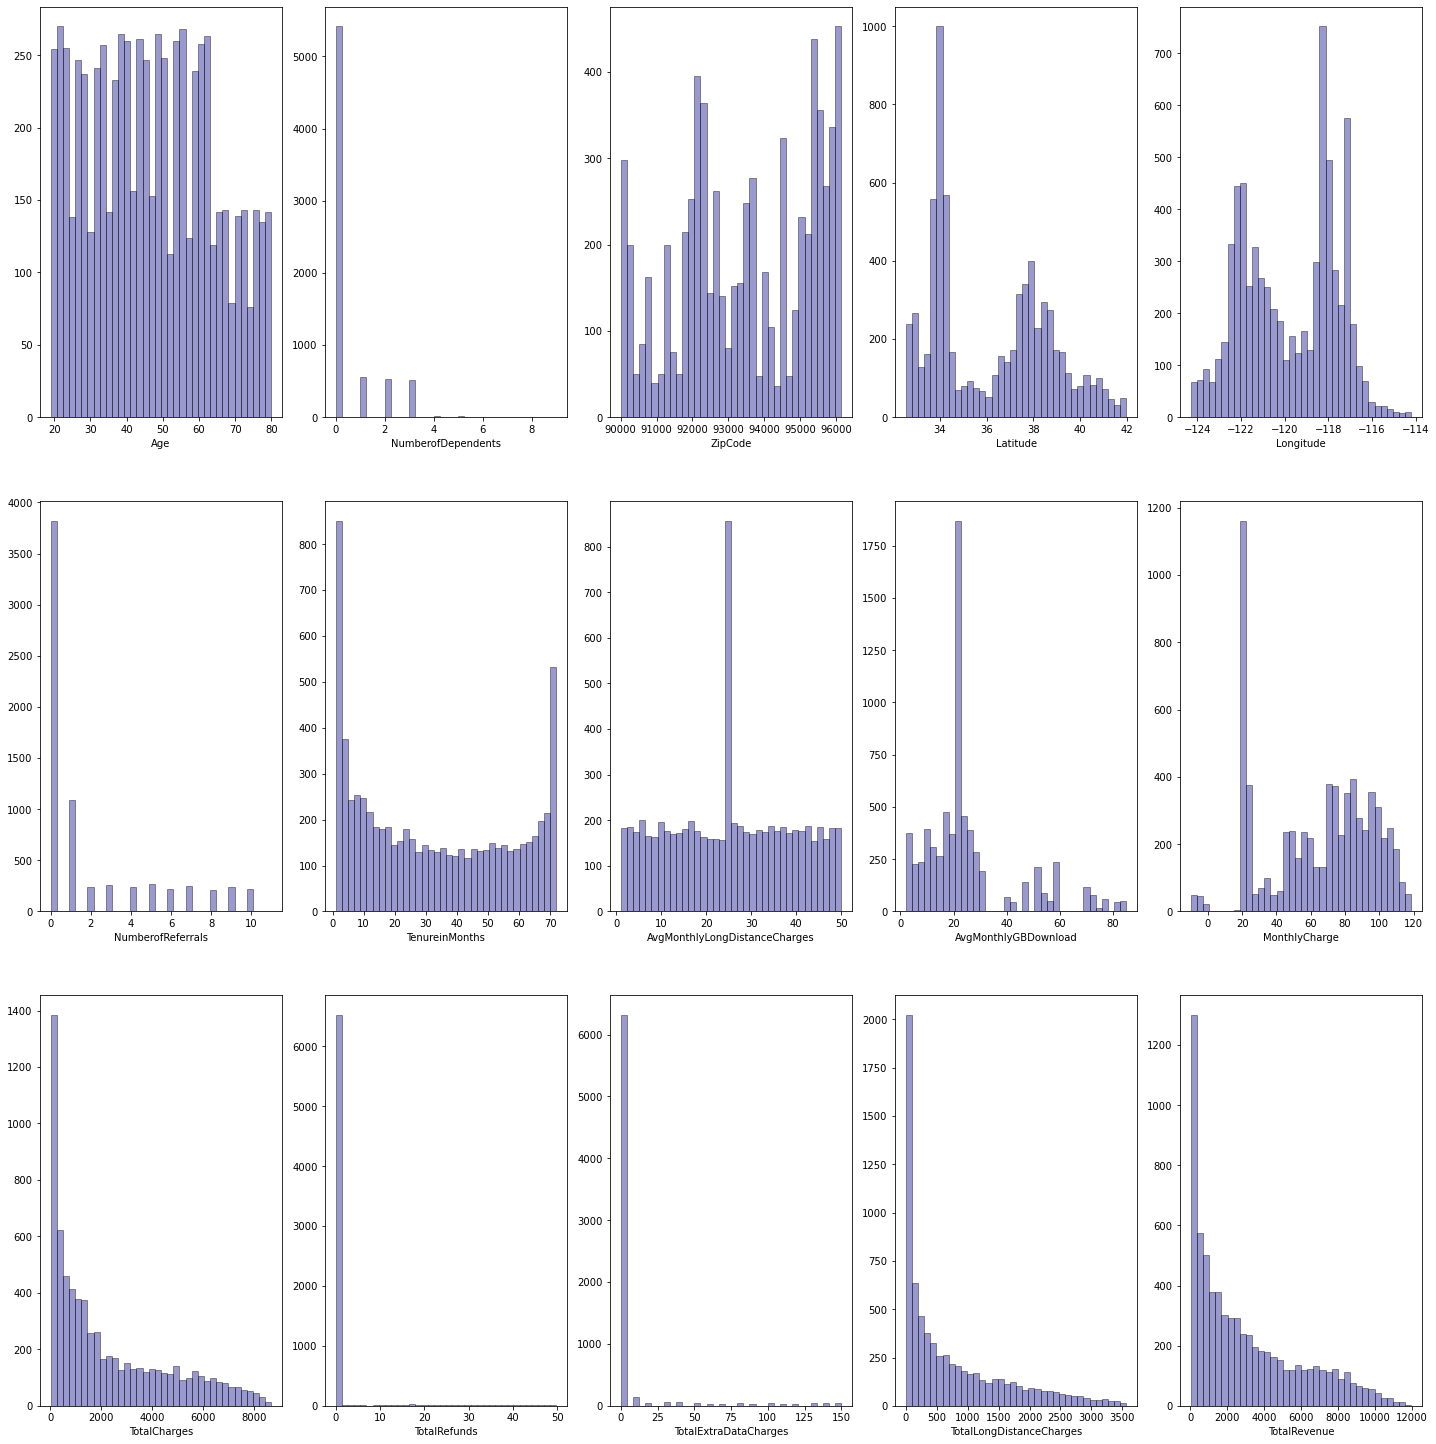

In [25]:
fig,ax = plt.subplots(ncols=5,nrows = 3,figsize = (20,20))
index = 0 
ax = ax.flatten()
for col,value in df_num.items():
     sns.distplot(value,ax = ax[index],
                 hist=True, kde=False, 
              bins=int(180/5), color = 'darkblue', 
              hist_kws={'edgecolor':'black'},
              kde_kws={'linewidth': 4})
     index += 1
plt.tight_layout(pad= 0.5,w_pad= 0.7,h_pad=5.0);

#### Quick look at the relation between monthly and total charges 

(20.0, 125.1875)

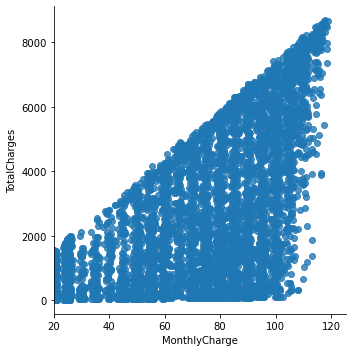

In [26]:
sns.lmplot(data=df, x='MonthlyCharge', y='TotalCharges', fit_reg=False)
plt.xlim(20, None)



$Inference$: It is clear that as the monthly charges are increasing we can experience the total charges also increase which shows the positive correlation too.

#### Target Variable Visualization

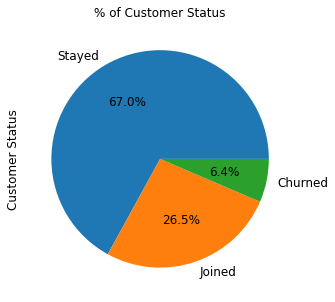

In [27]:
import matplotlib.ticker as mtick
ax = (df_cat['CustomerStatus'].value_counts()*100.0 /len(df_cat))\
.plot.pie(autopct='%.1f%%', labels = ['Stayed','Joined','Churned'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Customer Status',fontsize = 12)
ax.set_title('% of Customer Status', fontsize = 12);

The data is skewed as we would expect a large majority of the customers to not churn. This is important to keep in mind for our modelling as skeweness could lead to a lot of false negatives. We will see in the modelling section on how to avoid skewness in the data.

In other words, dataset has class imbalance.

Let's now explore the churn rate by different features.

### Bivariate Analysis




In [28]:
cleaned_df = pd.concat([df_cat, df_num], axis=1, join='inner')
cleaned_df

,Gender,Married,City,Offer,PhoneService,MultipleLines,InternetService,InternetType,OnlineSecurity,OnlineBackup,DeviceProtectionPlan,PremiumTechSupport,StreamingTV,StreamingMovies,StreamingMusic,UnlimitedData,Contract,PaperlessBilling,PaymentMethod,CustomerStatus,ChurnCategory,ChurnReason,Age,NumberofDependents,ZipCode,Latitude,Longitude,NumberofReferrals,TenureinMonths,AvgMonthlyLongDistanceCharges,AvgMonthlyGBDownload,MonthlyCharge,TotalCharges,TotalRefunds,TotalExtraDataCharges,TotalLongDistanceCharges,TotalRevenue
Customer ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,Female,Yes,Frazier Park,None,Yes,No,Yes,Cable,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,Stayed,Competitor,Competitor had better devices,37,0,93225,34.827662,-118.999073,2,9,42.390000,16.0,65.60,593.30,0.00,0,381.51,974.81
0003-MKNFE,Male,No,Glendale,None,Yes,Yes,Yes,Cable,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,Stayed,Competitor,Competitor had better devices,46,0,91206,34.162515,-118.203869,0,9,10.690000,10.0,-4.00,542.40,38.33,10,96.21,610.28
0004-TLHLJ,Male,No,Costa Mesa,Offer E,Yes,No,Yes,Fiber Optic,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,Churned,Competitor,Competitor had better devices,50,0,92627,33.645672,-117.922613,0,4,33.650000,30.0,73.90,280.85,0.00,0,134.60,415.45
0011-IGKFF,Male,Yes,Martinez,Offer D,Yes,No,Yes,Fiber Optic,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,Churned,Dissatisfaction,Product dissatisfaction,78,0,94553,38.014457,-122.115432,1,13,27.820000,4.0,98.00,1237.85,0.00,0,361.66,1599.51
0013-EXCHZ,Female,Yes,Camarillo,None,Yes,No,Yes,Fiber Optic,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,Churned,Dissatisfaction,Network reliability,75,0,93010,34.227846,-119.079903,3,3,7.380000,11.0,83.90,267.40,0.00,0,22.14,289.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987-LUTYD,Female,No,La Mesa,Offer D,Yes,No,Yes,DSL,Yes,No,No,Yes,No,No,Yes,Yes,One Year,No,Credit Card,Stayed,Competitor,Competitor had better devices,20,0,91941,32.759327,-116.997260,0,13,46.680000,59.0,55.15,742.90,0.00,0,606.84,1349.74
9992-RRAMN,Male,Yes,Riverbank,Offer D,Yes,Yes,Yes,Fiber Optic,No,No,No,No,No,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,Churned,Dissatisfaction,Product dissatisfaction,40,0,95367,37.734971,-120.954271,1,22,16.200000,17.0,85.10,1873.70,0.00,0,356.40,2230.10
9992-UJOEL,Male,No,Elk,Offer E,Yes,No,Yes,DSL,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,Joined,Competitor,Competitor had better devices,22,0,95432,39.108252,-123.645121,0,2,18.620000,51.0,50.30,92.75,0.00,0,37.24,129.99


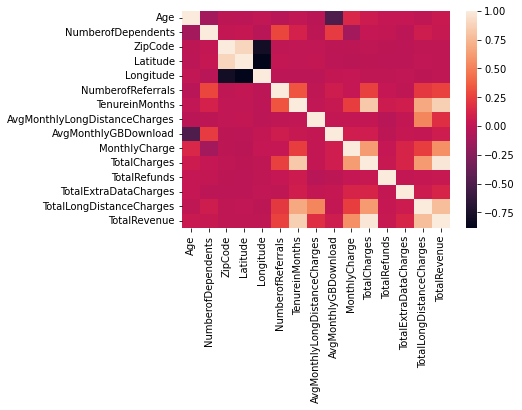

<Figure size 1440x1440 with 0 Axes>

In [29]:
sns.heatmap(cleaned_df.corr())
plt.figure(figsize= (20,20));

### Age

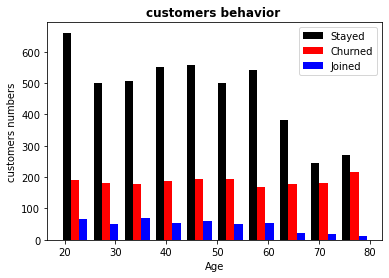

In [30]:
Customer_Stayed=cleaned_df[cleaned_df['CustomerStatus']=='Stayed'].Age
Customer_Churned=cleaned_df[cleaned_df['CustomerStatus']=='Churned'].Age
Customer_Joined=cleaned_df[cleaned_df['CustomerStatus']=='Joined'].Age


plt.xlabel('Age')
plt.ylabel('customers numbers')
plt.hist([Customer_Stayed,Customer_Churned,Customer_Joined], color=['black','red','blue'],label=['Stayed','Churned','Joined'])


plt.title('customers behavior ',fontweight ="bold")
plt.legend();

Senior Citizens are more likely to churn than the younger population.

#### Gender

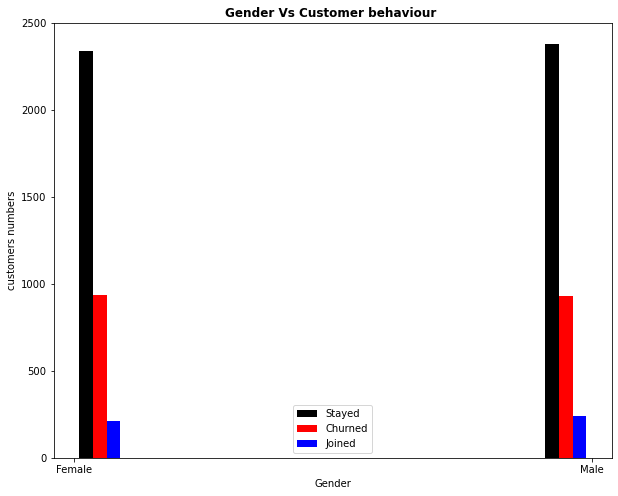

In [31]:
Customer_Stayed=cleaned_df[cleaned_df['CustomerStatus']=='Stayed'].Gender
Customer_Churned=cleaned_df[cleaned_df['CustomerStatus']=='Churned'].Gender
Customer_Joined=cleaned_df[cleaned_df['CustomerStatus']=='Joined'].Gender

plt.figure(figsize=(10,8))
plt.xlabel('Gender')
plt.ylabel('customers numbers')
plt.hist([Customer_Stayed,Customer_Churned,Customer_Joined], color=['black','red','blue'],label=['Stayed','Churned','Joined'])


plt.title('Gender Vs Customer behaviour ',fontweight ="bold")
plt.legend();

The customer behaviour clearly shows that gender has little to no effect on customer behaviour.

#### Marital Status

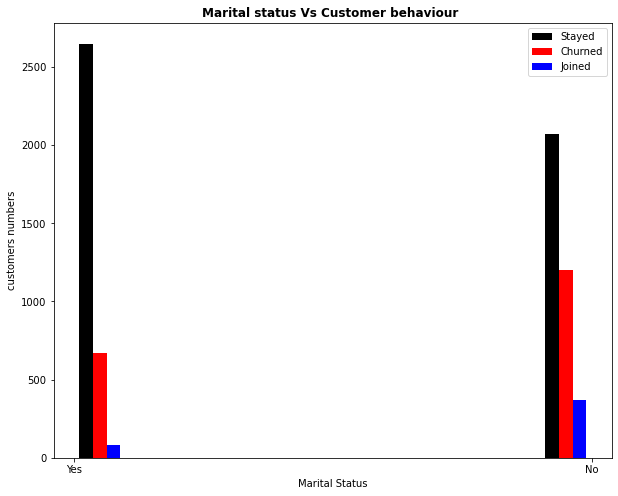

In [32]:
Customer_Stayed=cleaned_df[cleaned_df['CustomerStatus']=='Stayed'].Married
Customer_Churned=cleaned_df[cleaned_df['CustomerStatus']=='Churned'].Married
Customer_Joined=cleaned_df[cleaned_df['CustomerStatus']=='Joined'].Married

plt.figure(figsize=(10,8))
plt.xlabel('Marital Status')
plt.ylabel('customers numbers')
plt.hist([Customer_Stayed,Customer_Churned,Customer_Joined], color=['black','red','blue'],label=['Stayed','Churned','Joined'])


plt.title('Marital status Vs Customer behaviour ',fontweight ="bold")
plt.legend();

The customer behaviour clearly shows that unmarried customers are more likely to churn those married customers. 

#### Offer and Category.

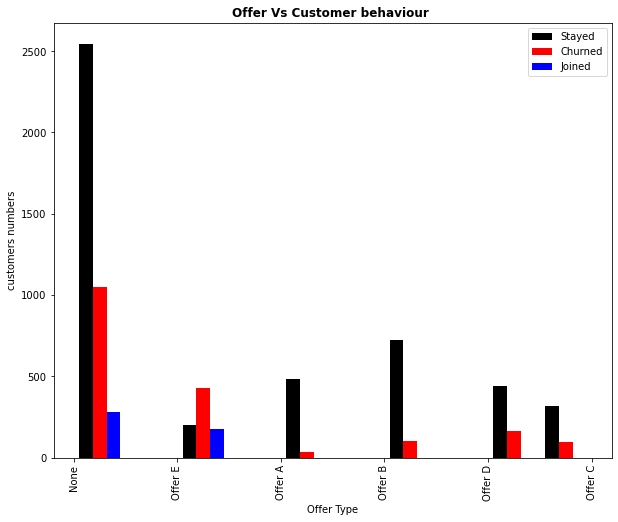

In [33]:
Customer_Stayed=cleaned_df[cleaned_df['CustomerStatus']=='Stayed'].Offer
Customer_Churned=cleaned_df[cleaned_df['CustomerStatus']=='Churned'].Offer
Customer_Joined=cleaned_df[cleaned_df['CustomerStatus']=='Joined'].Offer

plt.figure(figsize=(10,8))
plt.xlabel('Offer Type')
plt.xticks(rotation=90)
plt.ylabel('customers numbers')
plt.hist([Customer_Stayed,Customer_Churned,Customer_Joined], color=['black','red','blue'],label=['Stayed','Churned','Joined'])


plt.title('Offer Vs Customer behaviour ',fontweight ="bold")
plt.legend();

Customers without an offer are more likely to churn than those in one. 

#### Phone Service 

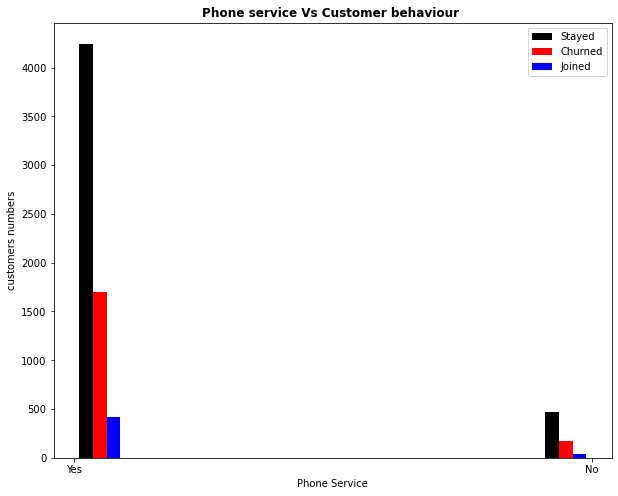

In [34]:
Customer_Stayed=cleaned_df[cleaned_df['CustomerStatus']=='Stayed'].PhoneService
Customer_Churned=cleaned_df[cleaned_df['CustomerStatus']=='Churned'].PhoneService
Customer_Joined=cleaned_df[cleaned_df['CustomerStatus']=='Joined'].PhoneService

plt.figure(figsize=(10,8))
plt.xlabel('Phone Service')
plt.ylabel('customers numbers')
plt.hist([Customer_Stayed,Customer_Churned,Customer_Joined], color=['black','red','blue'],label=['Stayed','Churned','Joined'])


plt.title('Phone service Vs Customer behaviour ',fontweight ="bold")
plt.legend();

From the above figure, we concluded that the observed statistic that customers on a phone service are more likely to churn is incorrect and can only be attributed to the vast difference of the total number of customers on the  home phone service compared to those out of the service.

#### Tenure 

<AxesSubplot:xlabel='CustomerStatus', ylabel='TenureinMonths'>

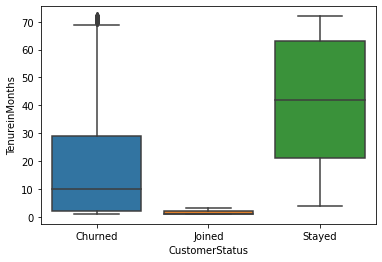

In [35]:
sns.boxplot(x = cleaned_df.CustomerStatus, y = cleaned_df.TenureinMonths)


As we can see form the above plot, the customers who do not churn, they tend to stay for a longer tenure with the telecom company.

#### Payment Method 

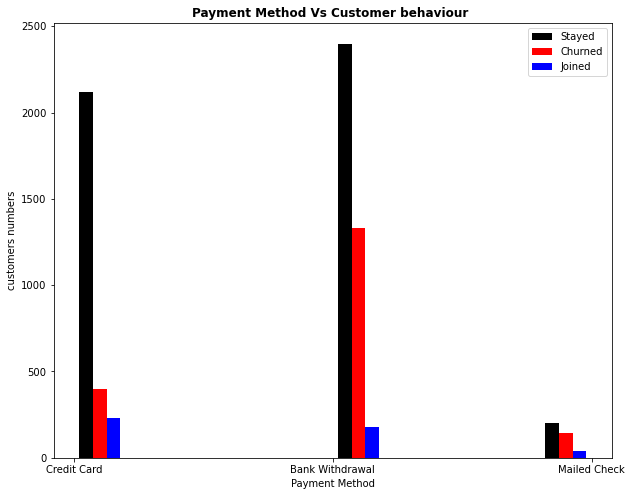

In [36]:
Customer_Stayed=cleaned_df[cleaned_df['CustomerStatus']=='Stayed'].PaymentMethod
Customer_Churned=cleaned_df[cleaned_df['CustomerStatus']=='Churned'].PaymentMethod
Customer_Joined=cleaned_df[cleaned_df['CustomerStatus']=='Joined'].PaymentMethod

plt.figure(figsize=(10,8))
plt.xlabel('Payment Method')
plt.ylabel('customers numbers')
plt.hist([Customer_Stayed,Customer_Churned,Customer_Joined], color=['black','red','blue'],label=['Stayed','Churned','Joined'])


plt.title('Payment Method Vs Customer behaviour ',fontweight ="bold")
plt.legend();

 We can conclude from the above graph that customers who pay via bank are more likely to churn as compared to  those who pay via credit card  and mailed check respectively. However, this can be as a result of the difference in number of customers of different payment methods or other underlying factors.

#### Tech Support 

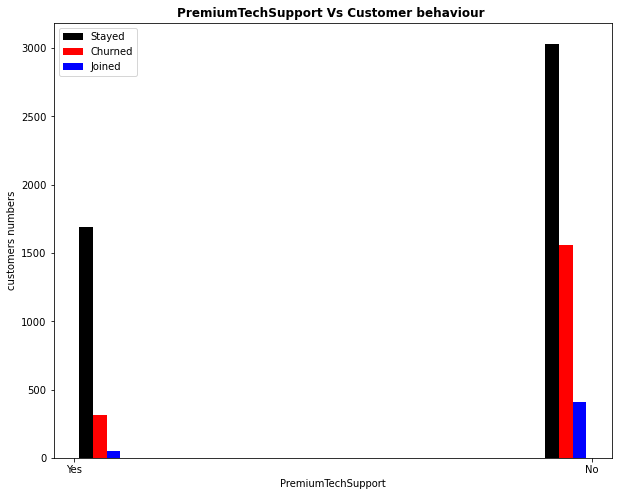

In [37]:
Customer_Stayed=cleaned_df[cleaned_df['CustomerStatus']=='Stayed'].PremiumTechSupport
Customer_Churned=cleaned_df[cleaned_df['CustomerStatus']=='Churned'].PremiumTechSupport
Customer_Joined=cleaned_df[cleaned_df['CustomerStatus']=='Joined'].PremiumTechSupport

plt.figure(figsize=(10,8))
plt.xlabel('PremiumTechSupport')
plt.ylabel('customers numbers')
plt.hist([Customer_Stayed,Customer_Churned,Customer_Joined], color=['black','red','blue'],label=['Stayed','Churned','Joined'])


plt.title('PremiumTechSupport Vs Customer behaviour ',fontweight ="bold")
plt.legend();

Customers on premium tech support are less likely to churn as compared to those out of tech support.

#### Internet Service 

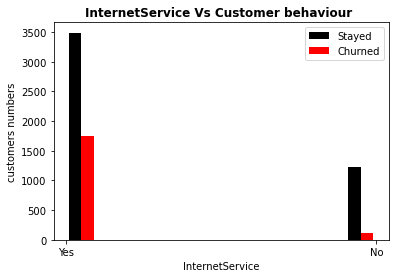

In [38]:
Customer_Stayed=cleaned_df[cleaned_df['CustomerStatus']=='Stayed'].InternetService
Customer_Churned=cleaned_df[cleaned_df['CustomerStatus']=='Churned'].InternetService



plt.xlabel('InternetService')
plt.ylabel('customers numbers')
plt.hist([Customer_Stayed,Customer_Churned], color=['black','red'],label=['Stayed','Churned'])


plt.title('InternetService Vs Customer behaviour ',fontweight ="bold")
plt.legend();

#### Internet type 

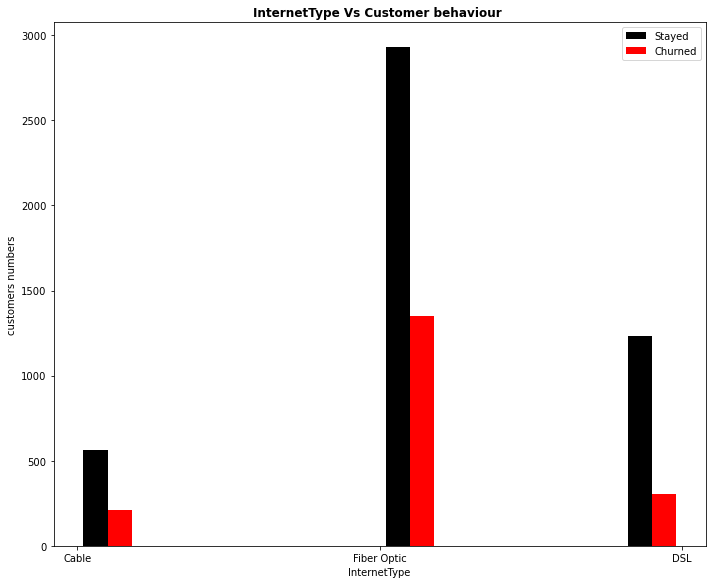

In [39]:
Customer_Stayed=cleaned_df[cleaned_df['CustomerStatus']=='Stayed'].InternetType
Customer_Churned=cleaned_df[cleaned_df['CustomerStatus']=='Churned'].InternetType


plt.figure(figsize=(10,8))
plt.xlabel('InternetType')
plt.ylabel('customers numbers')
plt.hist([Customer_Stayed,Customer_Churned], color=['black','red'],label=['Stayed','Churned'])
plt.tight_layout()

plt.title('InternetType Vs Customer behaviour ',fontweight ="bold")
plt.legend();

Fiber optic internet type is the most popular but its affected by a high churn rate. The same is observed hierarchically in DSL and cable respectively

## Pre-processing

In [40]:
#Dropping unnecessary features
df_cat = df_cat.drop(['ChurnReason','ChurnCategory','City'],axis=1)

In [41]:
# Concatenating the final data
data = pd.concat([df_cat, df_num], axis=1)

### Train_Test Split

The first step when building a model is to split the data into two groups, which are typically referred to as training and testing sets. The training set is used by the machine learning algorithm to build the model. 

The test set contains samples that are not part of the learning process and is used to evaluate the model’s performance. It is important to assess the quality of the model using unseen data to guarantee an objective evaluation.

In [42]:
#To start out, we'll consider y to be the target variable and everything else to be X.
X = data.drop(['CustomerStatus'],axis=1)
y = data['CustomerStatus']

In [43]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=1)

Specifying a `random_state` means that we will get consistent results even if the kernel is restarted.

# Feature Engineering

Feature engineering is the process of extracting features from the data and transforming them into a format that is suitable for the machine learning model.

Most machine learning algorithms require numerical values; therefore, all categorical attributes available in the dataset should be encoded into numerical labels before training the model. In addition, we need to transform numeric columns into a common scale. This will prevent that the columns with large values dominate the learning process.

### 1. Train Data

### One Hot Encoding 
One-hot encoding creates a new binary column for each level of the categorical variable. The new column contains zeros and ones indicating the absence or presence of the category in the data. 

In [44]:
#isolate the categorical data
X_train_cat = X_train.select_dtypes(exclude=["int64", "float64"])

In [45]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

ohe.fit(X_train_cat)
X_train_ohe = pd.DataFrame(
    ohe.transform(X_train_cat),
    # index is important to ensure we can concatenate with other columns
    index=X_train_cat.index,
    # we are dummying multiple columns at once, so stack the names
    columns=np.hstack(ohe.categories_)
)

### Normalization

Data Normalization is a common practice in machine learning which consists of translating data into the range [0, 1] or simply transforming data onto the unit sphere.

If the features are scaled differently, some features may have a greater impact on the model than others. We frequently normalize all features to a constant scale of 0 to 1 to level the playing field.
 

In [46]:
X_train_num = X_train.select_dtypes(include=["int64", "float64"])

In [47]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train_num)
X_train_scaled = pd.DataFrame(
    scaler.transform(X_train_num),
    # index is important to ensure we can concatenate with other columns
    index=X_train_num.index,
    columns=X_train_num.columns
)
X_train_scaled

,Age,NumberofDependents,ZipCode,Latitude,Longitude,NumberofReferrals,TenureinMonths,AvgMonthlyLongDistanceCharges,AvgMonthlyGBDownload,MonthlyCharge,TotalCharges,TotalRefunds,TotalExtraDataCharges,TotalLongDistanceCharges,TotalRevenue
Customer ID,,,,,,,,,,,,,,,
9143-CANJF,0.163934,0.375,0.997235,0.646399,0.476057,0.636364,0.323944,0.538179,1.000000,0.506019,0.150133,0.0,0.000000,0.184273,0.163520
0426-TIRNE,0.573770,0.000,0.213856,0.169517,0.572102,0.000000,0.000000,0.296039,0.228916,0.240000,0.000242,0.0,0.000000,0.004351,0.001259
6140-QNRQQ,0.377049,0.000,0.504472,0.200159,0.456647,0.000000,0.000000,0.331972,0.096386,0.633398,0.006087,0.0,0.000000,0.004845,0.005641
8800-JOOCF,0.606557,0.125,0.329647,0.085767,0.692659,0.000000,0.154930,0.343814,0.204819,0.730485,0.109364,0.0,0.000000,0.060089,0.096955
2612-RRIDN,0.098361,0.000,0.997886,0.820270,0.324805,0.000000,0.042254,0.420784,0.686747,0.706796,0.037162,0.0,0.333333,0.024260,0.038131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1320-GVNHT,0.606557,0.250,0.196129,0.172921,0.597365,0.363636,1.000000,0.548591,0.337349,0.919612,0.894121,0.0,0.200000,0.563119,0.818136
7305-ZWMAJ,0.426230,0.000,0.871686,0.555926,0.348740,0.181818,0.408451,0.446713,0.228916,0.238447,0.065578,0.0,0.000000,0.192638,0.104737
5606-AMZBO,0.065574,0.000,0.578793,0.249537,0.582692,0.363636,0.126761,0.755819,0.481928,0.684660,0.086124,0.0,0.000000,0.106684,0.094003


In [48]:
X_train_full = pd.concat([X_train_scaled, X_train_ohe], axis=1)

### Target Variable

In [49]:
from imblearn.over_sampling import SMOTE
# Previous original class distribution
print('Original class distribution: \n')
print(y.value_counts())
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_full, y_train) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts())

Original class distribution: 

Stayed     4720
Churned    1869
Joined      454
Name: CustomerStatus, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

Churned    3540
Joined     3540
Stayed     3540
Name: CustomerStatus, dtype: int64


### Label Encoding
Label encoding is used to replace categorical values with numerical values. This encoding replaces every category with a numerical label.

In [50]:
# Label encoding the target column
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
y_train_label = label.fit_transform(y_train_resampled)
y_train_label = pd.Series(y_train_label)

Let's now preprocess our test data using the same methodology so that we can assess the model's performance on untested data.

### 2. Test Data 

In [58]:
#One Hot Encoding
X_test_cat = X_test.select_dtypes(exclude=["int64", "float64"])
ohe.fit(X_test_cat)
X_test_ohe = pd.DataFrame(
    ohe.transform(X_test_cat),
    # index is important to ensure we can concatenate with other columns
    index=X_test_cat.index,
    # we are dummying multiple columns at once, so stack the names
    columns=np.hstack(ohe.categories_)
)
X_test_ohe

# Normalization
X_test_num = X_test.select_dtypes(include=["int64", "float64"])
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test_num),
    index=X_test_num.index,
    columns=X_test_num.columns
)

# Concatenating categorical and numeric data
X_test_full = pd.concat([X_test_scaled, X_test_ohe], axis=1)
X_test_full

,Age,NumberofDependents,ZipCode,Latitude,Longitude,NumberofReferrals,TenureinMonths,AvgMonthlyLongDistanceCharges,AvgMonthlyGBDownload,MonthlyCharge,TotalCharges,TotalRefunds,TotalExtraDataCharges,TotalLongDistanceCharges,TotalRevenue,Female,Male,No,Yes,None,Offer A,Offer B,Offer C,Offer D,Offer E,No,Yes,No,Yes,No,Yes,Cable,DSL,Fiber Optic,No,Yes,No,Yes,No,Yes,No,Yes,No,Yes,No,Yes,No,Yes,No,Yes,Month-to-Month,One Year,Two Year,No,Yes,Bank Withdrawal,Credit Card,Mailed Check
Customer ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4815-YOSUK,0.049180,0.250,0.431778,0.107952,0.649896,0.818182,1.000000,0.820131,0.602410,0.892427,0.867609,0.000000,0.000000,0.831751,0.876494,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
8747-UDCOI,0.163934,0.000,0.420556,0.121519,0.697500,0.636364,0.901408,0.972846,0.228916,0.227961,0.150144,0.000000,0.000000,0.887279,0.373097,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
6797-UCJHZ,0.901639,0.000,0.498292,0.182178,0.547353,0.636364,0.915493,0.500204,0.156627,0.890097,0.784751,0.000000,0.000000,0.472312,0.709296,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
5261-QSHQM,0.196721,0.000,0.421369,0.101148,0.719387,0.000000,0.042254,0.498377,0.084337,0.267573,0.007824,0.000000,0.000000,0.000000,0.005456,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
5989-PGKJB,0.344262,0.000,0.344772,0.036442,0.702226,0.000000,0.211268,0.434667,0.313253,0.747573,0.152469,0.000000,0.000000,0.100092,0.140119,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3726-TBHQT,0.098361,0.125,0.862742,0.514398,0.412932,0.000000,0.985915,0.498979,0.686747,0.963107,0.941276,0.000000,0.000000,0.506898,0.833041,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
8387-UGUSU,0.622951,0.125,0.424947,0.119545,0.639867,0.272727,0.197183,0.753165,0.228916,0.233398,0.030637,0.000000,0.000000,0.159480,0.069530,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8637-XJIVR,0.245902,0.375,0.047325,0.151137,0.579306,0.000000,0.154930,0.496733,0.650602,0.690874,0.104841,0.000000,0.533333,0.085303,0.107884,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [52]:
# label encoding y_test
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
y_test_label = label.fit_transform(y_test)
y_test_label=pd.Series(y_test_label)

# Modelling 
Modeling techniques are based around the use of algorithms - sequences of instructions for solving specific problems. 

They include ADA Boost, RandomForest, SVM, Lasso Regression, Naive Bayes, and Logistic Regression. We use the logistic regression as the baseline model.

#### Models before Hyperparameter Tuning

In [77]:
models = {
     
        'lasso': {
            'model': Lasso(),
            'params': {}
        },
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {}  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {}
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {}
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {}    
    }
        
     
      }

In [78]:
scores = []
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
for model_name, m in models.items():
    clf =  GridSearchCV(m['model'], m['params'], cv=cv, return_train_score=False)
    clf.fit(X_train_resampled, y_train_label)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,lasso,-0.001469,{}
1,svm,0.780320,{}
2,random_forest,0.920151,{}
3,logistic_regression,0.787476,{}
4,naive_bayes_gaussian,0.750094,{}
5,naive_bayes_multinomial,0.712147,{}
6,decision_tree,0.859322,{}


The baseline model had a best score of ~78%. The random_forest performed best with a ~92% score.

#### Models after Hyperparameter Tuning

In [67]:

model_params = {
     
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10],
            'max_leaf_nodes': [10,20,30],
            'max_depth': [2,4,6]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {}
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            'max_leaf_nodes': [10,20,30],
            'max_depth': [2,4,6]
        }    
    }
        
     
      }

In [59]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()

# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)

model.fit(X_train_resampled,y_train_label)
preds = model.predict(X_test_full)
print(accuracy_score(y_test_label, preds))

0.6695059625212947


In [69]:
scores = []
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=cv, return_train_score=False)
    clf.fit(X_train_resampled, y_train_label)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,lasso,-0.001469,"{'alpha': 1, 'selection': 'random'}"
1,svm,0.855085,"{'C': 20, 'kernel': 'rbf'}"
2,random_forest,0.815443,"{'max_depth': 6, 'max_leaf_nodes': 30, 'n_esti..."
3,logistic_regression,0.787476,{}
4,naive_bayes_gaussian,0.750094,{}
5,naive_bayes_multinomial,0.712147,{}
6,decision_tree,0.822316,"{'criterion': 'gini', 'max_depth': 6, 'max_lea..."


After hyperparameter tuning some models performed better for example the svm for example while others got worse like decision tree and random_forest.We therefore use random_forest without tuning parameters to predict unseen data. 

# Evaluation 

In [86]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train_resampled, y_train_label)

# Make predictions
prediction_test = model_rf.predict(X_test_full)
print(classification_report(y_test_label, prediction_test))

              precision    recall  f1-score   support

           0       0.66      0.67      0.66       456
           1       0.72      0.74      0.73       125
           2       0.90      0.89      0.90      1180

    accuracy                           0.83      1761
   macro avg       0.76      0.77      0.76      1761
weighted avg       0.83      0.83      0.83      1761



## Result Interpretation

Precision — What percent of your predictions were correct?
Based on the above findings, the model accurately predicts that one will discontinue utilizing the company's services 66% of the time.

Recall captures What percent of the positive cases the model predicts. This model captures 67% of the positive cases.

F1 score  answers the question of what percent of positive predictions were correct? On this, the model captures ~66% of correct positive predictions.

Accuracy, as its name implies, takes into account the model's overall accuracy, however this is only true when the model is balanced. This model balances for the situation at hand, accurately projecting the outcomes 83% of the time.



To evaluate the effectiveness of a machine learning classification, confusion matrix will be used. It takes the form of a matrix.

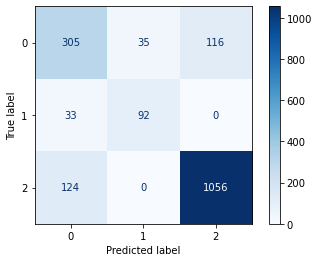

In [88]:
# Visualize our confusion matrix

plot_confusion_matrix(model_rf, X_test_full, y_test_label,
                     cmap=plt.cm.Blues)
plt.show()

From the confusion matrix out of 456 customers that the model predicted will churn,305 were correct

## Conclusions
When customers leave, they are going to the competition. Understanding churn factors will not only allow Telecom to understand why their customers are leaving but also to what extent the factors that lead to customer dissatisfaction affect the company. Overall, this will lead to the opportunity for Telecom to sharpen its attractiveness in the eyes of its customers by competing in the market well.

## Recommendations

1. Telecom should recruit more customers to their offer packages because there is a clear indication that it reduces customer churning.
2. Telecom should improve its relationship with new customers because we found out that the highest churning rates occur in the first 10 months.
3. Telecom should make premium tech support more attractive to customers because customers on the cover have low churn rates.
4. Telecom should make changes to their internet provision services as they all have high